# Spatial Operations

This notebook shows how to do some spatial operations. We focus here on averaging, since the sums can easily be infered.

In [1]:
import xarray as xr # requires >= 0.15.1
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

This is where you can find the dataset on the opendap (unfortunately parallel computing with dask won't work)

```python
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, engine='pydap')
```

I am using my local copy:

In [4]:
dataurl = '/work/Raphael.Dussin/runs/OM4p5_sample/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, engine='netcdf4')

In [5]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1    (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2    (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    volcello

## 2D horizontal averaging

Probably one of the most used data reduction. Since the ocean grid is not uniform, we need to weight by the cell area. Special care should also be taken with land values as we're gonna see next. The horizontal averaging can then be computed  : 

$\large \overline{tracer} = \Sigma_{i,j} (tracer ~\times~ dx ~\times~ dy ~\times~ mask) ~ / ~ \Sigma_{i,j} (dx ~\times~ dy ~\times~ mask)$

where mask is a binary mask (0: land, 1:ocean). In MOM6 terminology, this would be written (for a tracer) as:

$\large \overline{tracer} = \Sigma_{i,j} (tracer ~\times~ areacello ~\times~ wet) ~ / ~ \Sigma_{i,j} (areacello ~\times~ wet)$

NB: $\large areacello \neq dxt * dyt$, with error of a couple percent, as we can see here:

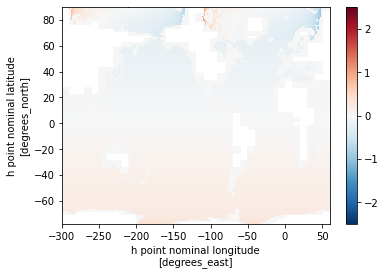

In [6]:
area_diff = (ds['dxt'].fillna(0.) * ds['dyt'].fillna(0.) * ds['wet'].fillna(0.)) - \
            (ds['areacello'].fillna(0.) * ds['wet'].fillna(0.))
area_error = 100 * area_diff / ds['areacello']
area_error.plot()

In [7]:
def horizontal_mean(da, metrics):
    num = (da * metrics['areacello'] * metrics['wet']).sum(dim=['xh', 'yh'])
    denom = (metrics['areacello'] * metrics['wet']).sum(dim=['xh', 'yh'])
    return num / denom

In [8]:
sst = ds['thetao'].isel(z_l=0)
mean_sst = horizontal_mean(sst, ds)

For reference, we print the first value of the obtained time-serie:

In [9]:
mean_sst.isel(time=0).values

array(18.483639, dtype=float32)

If you don't have the "wet" array, you can infer the land/sea mask using:

In [10]:
lsm = ~np.isnan(sst.isel(time=0))

and define a new function:

In [11]:
def horizontal_mean_no_wet(da, metrics, lsm):
    num = (da * metrics['areacello']).sum(dim=['xh', 'yh'])
    denom = (metrics['areacello'].where(lsm)).sum(dim=['xh', 'yh'])
    return num / denom

We verify that we get the same answer:

In [12]:
mean_sst = horizontal_mean_no_wet(sst, ds, lsm)
mean_sst.isel(time=0).values

array(18.483639, dtype=float32)

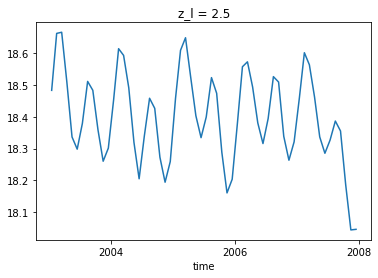

In [13]:
mean_sst.plot()

## Zonal average

Zonal average is just a simpler case, where averaging is only done over the longitude and can be written as:

$\large \overline{tracer} = \Sigma_{i} (tracer ~\times~ dxt ~\times~ wet) ~ / ~ \Sigma_{x} (dxt ~\times~ wet)$

and we can define the function as:

In [14]:
def zonal_mean(da, metrics):
    num = (da * metrics['dxt'] * metrics['wet']).sum(dim=['xh'])
    denom = (metrics['dxt'] * metrics['wet']).sum(dim=['xh'])
    return num/denom

In [15]:
zonalmean_sst = zonal_mean(sst, ds)

If we want to plot the zonal mean, we also need to have the correct latitude array and not the so-called nominal coordinate yh.
We can calculate it with the same formula:

In [16]:
correct_lat = zonal_mean(ds['geolat'], ds)

Then replace the bad latitudes with the correct ones in the data array:

In [17]:
zonalmean_sst = zonalmean_sst.rename({'yh': 'lat'})
zonalmean_sst['lat'] = correct_lat.values

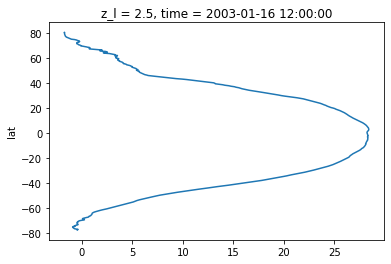

In [18]:
zonalmean_sst.isel(time=0).plot(y='lat')

## 3D average

Same method than for the 2D horizontal average, except we use volume instead of area and sum over 3 dimensions:

$\large \overline{tracer} = \Sigma_{i,j,k} (tracer ~\times~ dx ~\times~ dy ~\times~ dz ~\times~ mask) ~ / ~ \Sigma_{i,j,k} (dx ~\times~ dy ~\times~ dz ~\times~ mask)$

or in MOM6 terminology, this would be written (for a tracer) as:

$\large \overline{tracer} = \Sigma_{i,j,k} (tracer ~\times~ volcello ~\times~ wet) ~ / ~ \Sigma_{i,j,k} (volcello ~\times~ wet)$

the function is:

In [19]:
def global_mean(da, metrics):
    num = (da.fillna(0.) * metrics['volcello'].fillna(0.)).sum(dim=['xh', 'yh', 'z_l'])
    denom = (metrics['volcello'].fillna(0.)).sum(dim=['xh', 'yh', 'z_l'])
    return num / denom

In [20]:
temp_global = global_mean(ds['thetao'], ds)

In [21]:
temp_global.isel(time=10).values

array(3.5970294, dtype=float32)

Let's make the compute go a little faster with dask.

In [22]:
do_full_computation = True

if do_full_computation:
    from dask.distributed import Client
    from dask.distributed import LocalCluster
    cluster = LocalCluster()
    client = Client(cluster)
    client

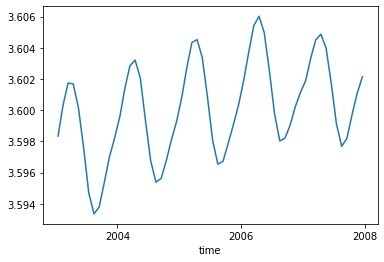

In [23]:
if do_full_computation:
    temp_global.plot()

## Using xgcm

[xgcm](https://xgcm.readthedocs.io/en/latest/index.html) provides some functions that perform the same computations in a elegant way.
In order to get the right answers with MOM6, we need to pay particular attention to which metrics we're using. Let's show an example:

In [24]:
from xgcm import Grid

We are pretty confident the function we wrote gives the right answer so we take it as our truth:

In [25]:
sst = ds['thetao'].isel(z_l=0)
mean_sst = horizontal_mean(sst, ds)
mean_sst.isel(time=0).values

array(18.483639, dtype=float32)

Now let's define the xgcm grid with only $dxt$ and $dyt$:

In [26]:
# make sure to fill in nans with zeros
ds['dxt'] = ds['dxt'].fillna(0.)
ds['dyt'] = ds['dyt'].fillna(0.)

metrics = {
    ('X',): ['dxt'], # X distances
    ('Y',): ['dyt']  # Y distances
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'} }

grid = Grid(ds, coords=coords, metrics=metrics, periodic=['X'])

In [27]:
mean_sst_xgcm = grid.average(sst, ['X', 'Y'])
mean_sst_xgcm.isel(time=0).values

array(18.482277, dtype=float32)

Ugh not good... Third decimal is off, but remember we need to use areacello, not dxt * dyt:

In [28]:
ds['areacello'] = ds['areacello'].fillna(0.)

metrics = {
    ('X',): ['dxt'], # X distances
    ('Y',): ['dyt'], # Y distances
    ('X', 'Y'): ['areacello'] # Areas
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'} }

grid = Grid(ds, coords=coords, metrics=metrics, periodic=['X'])

In [29]:
mean_sst_xgcm = grid.average(sst, ['X', 'Y'])
mean_sst_xgcm.isel(time=0).values

array(18.483637, dtype=float32)

Now we're consistent to the 6th decimal point.

Now with the 3d averaging, we can define a nominal layer thickness as:

In [30]:
ds['dzt'] = xr.DataArray(data=ds['z_i'].diff('z_i').values,
                         coords={'z_l': ds['z_l']},
                         dims=('z_l'))

However, because of the partial steps the volume of the cell can be different from areacello * dzt so we need to add volcello to the metrics:

In [31]:
ds['volcello'] = ds['volcello'].fillna(0.)

metrics = {
    ('X',): ['dxt'], # X distances
    ('Y',): ['dyt'], # Y distances
    ('Z',): ['dzt'],
    ('X', 'Y'): ['areacello'], # Areas
    ('X', 'Y', 'Z'): ['volcello'], # Volumes
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'},
        'Z': {'center': 'z_l', 'outer': 'z_i'}}

grid = Grid(ds, coords=coords, metrics=metrics, periodic=['X'])

In [32]:
%%time

mean_temp_xgcm = grid.average(ds['thetao'], ['X', 'Y', 'Z'])
# this is a bit long...

CPU times: user 18.1 s, sys: 413 ms, total: 18.5 s
Wall time: 51.6 s


In [33]:
mean_temp_xgcm.isel(time=10).values

array(3.597029, dtype=float32)

Which is in good agreement with our global_mean function!

In [34]:
if do_full_computation:
    cluster.close()
    client.close()